In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Yu gothic"

In [4]:
df = pd.read_csv("../Data/Time_Series_Odds/JW06251101.CSV", encoding="shift-jis")
df.head()

,レースID,区分,月日時分,頭数,枠連票数,枠1-1,枠1-2,枠1-3,枠1-4,枠1-5,...,枠5-5,枠5-6,枠5-7,枠5-8,枠6-6,枠6-7,枠6-8,枠7-7,枠7-8,枠8-8
0,2025010506010101,1,1041835,16,38,0.0,0.0,29.4,29.4,0.0,...,0.0,9.8,29.4,0.0,0.0,0.0,29.4,0.0,14.7,0.0
1,2025010506010101,1,1041840,16,85,0.0,65.8,16.4,65.8,65.8,...,65.8,7.3,21.9,65.8,21.9,32.9,32.9,0.0,13.1,0.0
2,2025010506010101,1,1041845,16,116,0.0,89.9,22.4,44.9,89.9,...,89.9,8.1,17.9,89.9,17.9,17.9,22.4,0.0,14.9,0.0
3,2025010506010101,1,1041850,16,153,0.0,118.5,29.6,59.2,118.5,...,118.5,9.1,19.7,118.5,14.8,19.7,16.9,0.0,19.7,0.0
4,2025010506010101,1,1041855,16,204,158.1,79.0,26.3,79.0,52.7,...,158.1,8.3,22.5,52.7,15.8,17.5,17.5,0.0,22.5,0.0


In [5]:
df["レースID"].unique()

array([2025010506010101])

2022/06/19 函館第1回4日目　第３レース

ファイル名は旧仕様, レースIDは新仕様

#### 旧仕様
| オフセット | サイズ  | 項目名       | 説明                                         |
|------------|---------|--------------|----------------------------------------------|
| +00,01     | 2byte   | 場所コード   | 開催場所を表すコード                         |
| +02,03     | 2byte   | 年           | 西暦の下2桁（例：2025年 → 25）              |
| +04        | 1byte   | 回次         | 16進数1桁で表現（英字は基本的に大文字）     |
| +05        | 1byte   | 日次         | 16進数1桁で表現（英字は基本的に大文字）     |
| +06,07     | 2byte   | レース番号   | レースの番号                                 |
| +08,09     | 2byte   | 馬番号       | 出走馬の番号                                 |


#### 新仕様
| オフセット   | サイズ  | 項目名       | 説明                   |
|--------------|---------|--------------|------------------------|
| +00～03      | 4byte   | 年           | 西暦4桁（例：2025）    |
| +04,05       | 2byte   | 月           | 月（01～12）           |
| +06,07       | 2byte   | 日           | 日（01～31）           |
| +08,09       | 2byte   | 場所コード   | 開催場所を表すコード   |
| +10,11       | 2byte   | 回次         | 開催回数               |
| +12,13       | 2byte   | 日次         | 開催日数               |
| +14,15       | 2byte   | レース番号   | レースの番号           |
| +16,17       | 2byte   | 馬番号       | 出走馬の番号           |　

ただし、このデータのrace_idは、馬番号がない形になっている。

In [6]:
df.tail()

,レースID,区分,月日時分,頭数,枠連票数,枠1-1,枠1-2,枠1-3,枠1-4,枠1-5,...,枠5-5,枠5-6,枠5-7,枠5-8,枠6-6,枠6-7,枠6-8,枠7-7,枠7-8,枠8-8
191,2025010506010101,1,1050954,16,119134,584.3,41.4,150.6,75.2,45.3,...,191.5,3.4,100.2,93.0,8.5,43.3,40.1,689.0,86.4,527.5
192,2025010506010101,1,1050959,16,155069,660.3,42.1,165.9,78.7,47.1,...,172.9,3.5,105.0,96.5,7.9,44.4,41.5,594.9,98.9,622.6
193,2025010506010101,1,1051004,16,224228,812.0,47.7,199.7,91.5,52.1,...,180.8,3.1,121.4,102.8,8.3,50.4,46.0,772.3,130.0,808.2
194,2025010506010101,3,1051005,16,224244,812.0,47.7,199.7,91.5,52.1,...,180.8,3.1,121.4,102.8,8.3,50.4,46.0,772.3,130.0,808.3
195,2025010506010101,4,1051011,16,224244,812.0,47.7,199.7,91.5,52.1,...,180.8,3.1,121.4,102.8,8.3,50.4,46.0,772.3,130.0,808.3


In [24]:
df.shape

(115, 42)

In [25]:
df.tail()

,レースID,区分,月日時分,頭数,単勝票数,複勝票数,1単,1複Lo,1複Hi,2単,...,9複Hi,10単,10複Lo,10複Hi,11単,11複Lo,11複Hi,12単,12複Lo,12複Hi
110,2022061902010403,1,6191043,12,59056,71109,3.6,1.3,1.8,27.3,...,1.2,17.9,2.8,5.5,16.2,2.8,5.5,18.5,3.9,7.9
111,2022061902010403,1,6191044,12,62165,73227,3.7,1.3,1.8,28.2,...,1.2,18.1,2.9,5.6,16.4,2.8,5.3,19.0,3.8,7.6
112,2022061902010403,1,6191049,12,88680,96149,3.9,1.2,1.8,30.1,...,1.2,19.7,3.0,5.7,16.5,2.5,4.7,20.4,4.2,8.3
113,2022061902010403,3,6191056,12,301699,340958,3.7,1.3,2.0,54.3,...,1.3,21.7,3.1,5.6,15.6,2.6,4.7,32.1,5.5,10.3
114,2022061902010403,4,6191101,12,301699,340958,3.7,1.3,2.0,54.3,...,1.3,21.7,3.1,5.6,15.6,2.6,4.7,32.1,5.5,10.3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   レースID   115 non-null    int64  
 1   区分      115 non-null    int64  
 2   月日時分    115 non-null    int64  
 3   頭数      115 non-null    int64  
 4   単勝票数    115 non-null    int64  
 5   複勝票数    115 non-null    int64  
 6   1単      115 non-null    float64
 7   1複Lo    115 non-null    float64
 8   1複Hi    115 non-null    float64
 9   2単      115 non-null    float64
 10  2複Lo    115 non-null    float64
 11  2複Hi    115 non-null    float64
 12  3単      115 non-null    float64
 13  3複Lo    115 non-null    float64
 14  3複Hi    115 non-null    float64
 15  4単      115 non-null    float64
 16  4複Lo    115 non-null    float64
 17  4複Hi    115 non-null    float64
 18  5単      115 non-null    float64
 19  5複Lo    115 non-null    float64
 20  5複Hi    115 non-null    float64
 21  6単      115 non-null    float64
 22  6複

In [ ]:
def datetime_transformer(df):
    df["month"] = df["月日時分"] // 1000000
    df["day_hour_min"] = df["月日時分"] % 1000000
    df["month"] = df["month"].astype(str).str.zfill(2)
    df["day_hour_min"] = df["day_hour_min"].astype(str).str.zfill(6)
    df["date"] = df["month"] + df["day_hour_min"]
    df["date"] = pd.to_datetime(df["date"], format="%m%d%H%M")
    df = df.drop(["month", "day_hour_min"], axis=1)

    return df

In [40]:
df2 = datetime_transformer(df)
df2.head()

0    06181933
1    06181945
2    06181952
3    06182001
4    06182009
Name: date, dtype: object

,レースID,区分,月日時分,頭数,単勝票数,複勝票数,1単,1複Lo,1複Hi,2単,...,10単,10複Lo,10複Hi,11単,11複Lo,11複Hi,12単,12複Lo,12複Hi,date
0,2022061902010403,1,6181933,12,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900-06-18 19:33:00
1,2022061902010403,1,6181945,12,31,28,12.4,2.1,11.2,24.8,...,0.0,0.0,0.0,12.4,2.1,11.2,24.8,1.2,3.7,1900-06-18 19:45:00
2,2022061902010403,1,6181952,12,166,147,3.4,1.2,1.4,66.4,...,0.0,5.8,9.8,2.8,1.4,1.9,16.6,1.9,3.0,1900-06-18 19:52:00
3,2022061902010403,1,6182001,12,239,358,3.9,1.5,2.6,63.7,...,10.6,1.8,3.0,3.4,2.2,3.8,17.3,3.1,5.7,1900-06-18 20:01:00
4,2022061902010403,1,6182009,12,289,502,4.5,1.6,2.7,46.2,...,12.1,2.3,3.9,4.0,2.8,5.0,16.5,2.1,3.7,1900-06-18 20:09:00


In [43]:
tan_col = [f"{i}単" for i in range(1, 13)]
df3 = df2[["date", *tan_col]]
df3.head()

,date,1単,2単,3単,4単,5単,6単,7単,8単,9単,10単,11単,12単
0,1900-06-18 19:33:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900-06-18 19:45:00,12.4,24.8,0.0,0.0,12.4,0.0,2.2,2.7,8.2,0.0,12.4,24.8
2,1900-06-18 19:52:00,3.4,66.4,26.5,132.8,44.2,44.2,7.3,6.0,7.3,0.0,2.8,16.6
3,1900-06-18 20:01:00,3.9,63.7,27.3,95.6,13.6,38.2,9.5,7.6,6.3,10.6,3.4,17.3
4,1900-06-18 20:09:00,4.5,46.2,12.8,115.6,11.5,33.0,9.2,8.8,5.1,12.1,4.0,16.5


Text(0.5, 1.0, '単勝の全期間のオッズの変動')

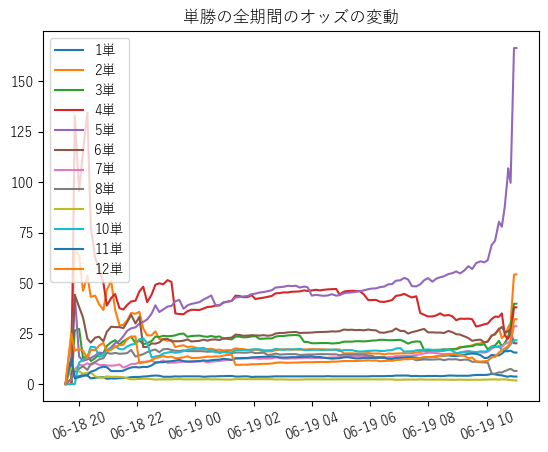

In [58]:
for i in range(1,13):
    plt.plot(df3["date"], df3[f"{i}単"], data=df2)
plt.xticks(rotation=20)
plt.legend(loc="upper left")
plt.title("単勝の全期間のオッズの変動")

Text(0.5, 1.0, '発走2時間前までのオッズの変動')

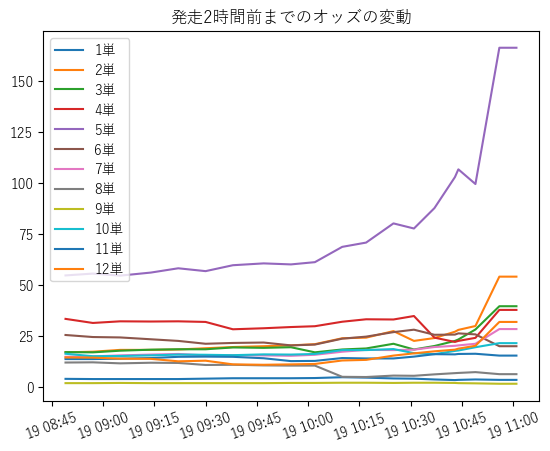

In [63]:
df4 = df3.tail(20)
df4.head()
for i in range(1,13):
    plt.plot(df4["date"], df4[f"{i}単"], data=df4)
plt.xticks(rotation=20)
plt.legend(loc="upper left")
plt.title("発走2時間前までのオッズの変動")

Text(0.5, 1.0, '1時間前までのオッズの変動')

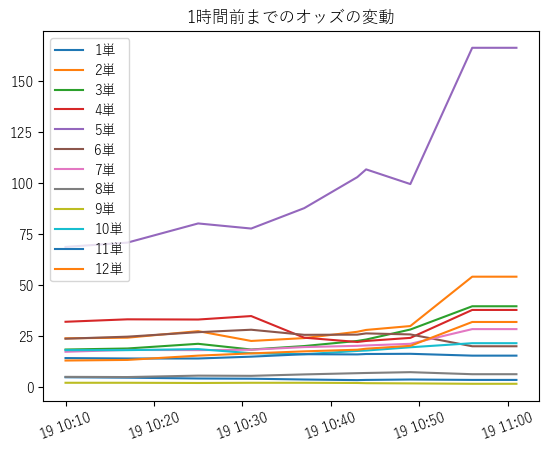

In [64]:
df4 = df3.tail(10)
df4.head()
for i in range(1,13):
    plt.plot(df4["date"], df4[f"{i}単"], data=df4)
plt.xticks(rotation=20)
plt.legend(loc="upper left")
plt.title("1時間前までのオッズの変動")

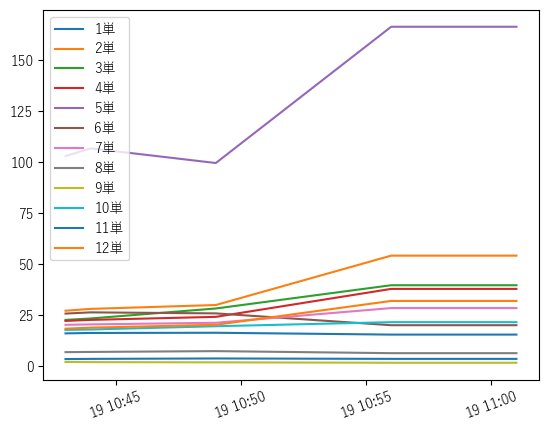

In [ ]:
df4 = df3.tail(5)
df4.head()
for i in range(1,13):
    plt.plot(df4["date"], df4[f"{i}単"], data=df4)
plt.xticks(rotation=20)
plt.legend(loc="upper left")
plt.title("発走15分前までのオッズの変動")